In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from pathlib import Path

In [4]:
def read_plot_monitoring_data(file_path,flag_time="Minutes"):
    rows_to_skip=14
    df_csv=pd.read_csv(file_path,delimiter=',',skiprows=rows_to_skip)
    file_name = os.path.basename(file_path)
    #time correction
    # time_point=df_csv["Time of day (hh:mm:ss) "][0]
    if file_name == "MOT1 cooler only v2 long term.csv":
        df_csv=df_csv[df_csv["Power (W)"] > 0.0112] #need to filter some bad points for this measurement
    df_csv['Power (mW)']=df_csv["Power (W)"]*1000
    print(df_csv)
    
    #plot
    fig, ax = plt.subplots()
    if flag_time.lower() == "minutes":
        df_csv['Time minutes']=df_csv['Samples ']/60 #assumes one sample per second
        x_plot="Time minutes"
        xlab="Time (Minutes)"
        rot=0
    elif flag_time.lower() == "hours":
        df_csv['Time Hours']=df_csv['Samples ']/(60*60)
        x_plot="Time Hours"
        xlab="Time (Hours)"
        rot=0
    elif flag_time.lower() == 'time of day':
        x_plot="Time of day (hh:mm:ss) "
        xlab="Time of day (hh:mm:ss)"
        rot=45
    else:
        raise Exception('valid flags are Minutes, Hours or Time of day')
        
        
    df_csv.plot(y='Power (mW)',x=x_plot,ylabel='mW',xlabel=xlab,grid='on',title=file_name,ax=ax)
    fig.autofmt_xdate(rotation=rot)
    power_mean_mw=df_csv['Power (mW)'].mean()
    power_std_mw=df_csv['Power (mW)'].std()
    
    def rms(values):
        return np.sqrt(sum(values**2)/len(values))
    def rmse(values,power_mean_mw):
        return np.sqrt(sum((values-power_mean_mw)**2)/len(values))
    def CV(std_val,mean_val):
        return std_val/mean_val
    def rms_stab(rms_val,mean_val):
        return rms_val/mean_val
    # def rms_normal(rms_val,mean_val):
    #     return rms_val/mean_val
    power_mW = df_csv['Power (mW)']
    print(power_mW)
    print(len(power_mW))
    # print(f"sum(power_mW) :{sum(power_mW)}")

    power_rmse_mW=rmse(power_mW,power_mean_mw)
    power_rmse_W=rmse(df_csv['Power (W)'],power_mean_mw/1000)
    
    print(f"power_rmse_mW {power_rmse_mW}")
    print(f"power rmse W {power_rmse_W}")
    
    CV_val=CV(power_std_mw,power_mean_mw)
    rms_val=rms(df_csv['Power (mW)'])
    rms_stab_val=rms_stab(rms_val,power_mean_mw)
    
    print(f'rms value : {rms_val}')
    print(f'rms stability : {rms_stab_val}')

    
    rms_norm=power_rmse_mW/power_mean_mw*100
    # power_rms_mW_norm=rms_normal(power_rms_mW,power_mean_mw)
    print(f"normalized rmse {rms_norm}")
    ax.legend([f"Mean: {power_mean_mw:.3f} mW, std: {power_std_mw:.3f} mw, RMSE: {power_rmse_mW:.3f} mW, RMSE_norm:{rms_norm:.3f}%,CV: {CV_val:.3f}"])
    
    return fig,ax

In [6]:
def read_plot_short_data(file_path,flag_save=True) -> float:
    rows_to_skip=22
    df_csv=pd.read_csv(file_path,delimiter=',',skiprows=rows_to_skip)
    file_name = os.path.basename(file_path)
    #time correction
    # time_point=df_csv["Time of day (hh:mm:ss) "][0]
 
    
    df_csv['Power (mW)']=df_csv["Power (W)"]*1000
    df_csv['Time (s)']=df_csv["Time (ms)"]*1000
    #plot
    fig, ax = plt.subplots()

    # df_csv['Time minutes']=df_csv['Samples ']/60 #assumes one sample per second
    x_plot="Time (s)"
    xlab="Time (s)"
    rot=0

        
        
    df_csv.plot(y='Power (mW)',x=x_plot,ylabel='mW',xlabel=xlab,grid='on',title=file_name,ax=ax)
    fig.autofmt_xdate(rotation=rot)
    power_mean_mw=df_csv['Power (mW)'].mean()
    power_std_mw=df_csv['Power (mW)'].std()
    def rms(values):
        return np.sqrt(sum(values**2)/len(values))

    power = df_csv['Power (W)']
    power_rms=rms(power)
    ax.legend([f"Mean: {power_mean_mw:.3f} mW, std: {power_std_mw:.3f} mw, rms: {power_rms*100:.3f} %"])
    
    return power_mean_mw,df_csv.copy()

      Samples  Date (MM/dd/yyyy)  Time of day (hh:mm:ss)   Power (W)  \
0            0          1/22/2024            12:43:16.125   0.011650   
1            1          1/22/2024            12:43:17.470   0.011644   
2            2          1/22/2024            12:43:18.474   0.011644   
3            3          1/22/2024            12:43:19.500   0.011646   
4            4          1/22/2024            12:43:20.513   0.011646   
...        ...                ...                     ...        ...   
3639      3639          1/22/2024            13:43:55.151   0.011699   
3640      3640          1/22/2024            13:43:56.168   0.011699   
3641      3641          1/22/2024            13:43:57.185   0.011698   
3642      3642          1/22/2024            13:43:58.197   0.011698   
3643      3643          1/22/2024            13:43:59.214   0.011698   

      Unnamed: 4  Power (mW)  
0            NaN      11.650  
1            NaN      11.644  
2            NaN      11.644  
3          

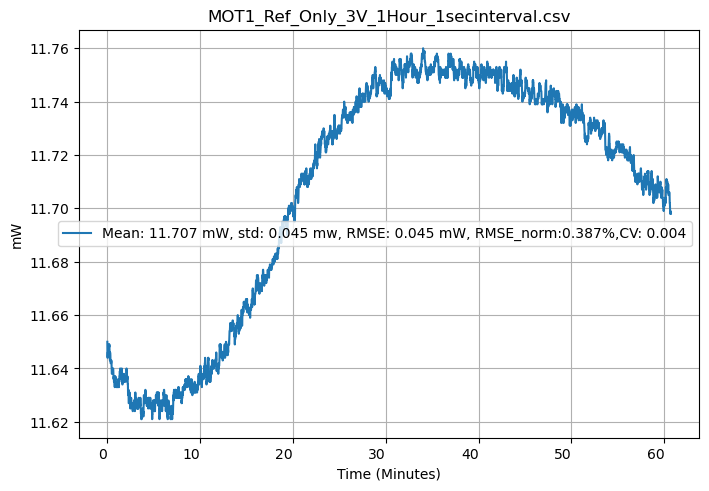

In [7]:
# plot long term data

fichier = 'MOT1_Ref_Only_3V_1Hour_1secinterval.csv' #this data should be filtered, otherwise has sharp dip
# fichier="MOT1_Ref_Only_3V_1Hour_1secinterval.csv"
fig,ax=read_plot_monitoring_data(fichier,flag_time="Minutes")

new_size = (8, 6)
#ax.set_xlim(0,3)
#ax.set_ylim(9,11)
fig.set_size_inches(new_size)
#plt.savefig(f'zoomed {fichier[:-4]}')

In [ ]:
#plot short term data (10 seconds measurement) for all the measurements in directory
# path_str = r'\Integration\099_System\ILS_780\power check\data\test muquans'
for root, dirs, files in os.walk(os.path.join(os.sys.path[0],"data","short term")):
    # print(root)
    # print(files)
    for file in files:
        file_path=os.path.join(root,file)
        mean_val,df=read_plot_short_data(file_path)
        print(f"{file} : mean power {mean_val:0.2f} mW")
    
    

NameError: name 'os' is not defined

In [ ]:
#new code 2023-07-13 using pandas to read the CSV.

path = Path(r'C:\Users\ArvidLindberg\OneDrive - PASQAL SAS\Documents partages - E&P\Projects\Fresnel_M2_HPCQS\Integration\099_System\ILS_780\power check\data\long term')
fichier = 'DET1_Rep_ONLY_@3V_2Hrs.csv' # to test, measurement done each 1 seconds
rows_to_skip=14
df_csv=pd.read_csv(fichier,delimiter=',',skiprows=rows_to_skip)
# skiprows, first part of the file is info on the machines.

df_csv.head()

,Samples,Date (MM/dd/yyyy),Time of day (hh:mm:ss),Power (W),Unnamed: 4
0,0,12/14/2023,11:24:17.215,0.010528,NaN
1,1,12/14/2023,11:24:18.661,0.010534,NaN
2,2,12/14/2023,11:24:19.681,0.010537,NaN
3,3,12/14/2023,11:24:20.697,0.010539,NaN
4,4,12/14/2023,11:24:21.713,0.010539,NaN


In [ ]:
print(df_csv.shape[0])
#read just the header to grab info, then discard the rest of the file
df_csv_info=pd.read_csv(path.joinpath(fichier),delimiter=';',skiprows=range(14, df_csv.shape[0]+rows_to_skip+1))
df_csv_info.head()
df_csv_info["Optical Power Monitor"]

4462


0                                  5.0.4561.773
1                         Delimiter Used: , ','
2     Start of Measurement , 7/18/2023 12:39:28
3                         Sample Interval , 1 s
4                             , PM400 201021312
5                                   Type, PM400
6                        Serialnumber, P5004235
7                                 Sensor, S121C
8                 SensorSerialnumber, 201021312
9             Wavelength / Responsivity, 780 nm
10                         ,,,PM400 201021312, 
Name: Optical Power Monitor, dtype: object

In [ ]:
#time correction
time_point=df_csv["Time of day (hh:mm:ss) "][0]
df_csv['Time minutes']=df_csv['Samples ']/60

# (b-a).total_seconds()

C:\Users\ArvidLindberg\AppData\Local\Temp\ipykernel_25492\819681421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_filter['Power (mW)']=df_csv_filter["Power (W)"]*1000


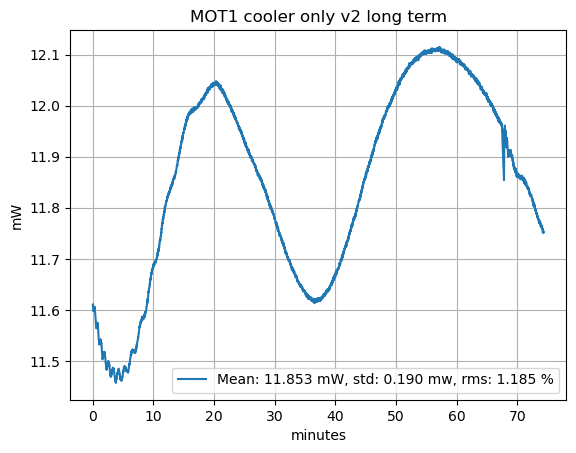

In [ ]:
#long term measurement

# df_csv["Time of day (hh:mm:ss) "]
df_csv_filter=df_csv.copy()
df_csv_filter=df_csv[df_csv["Power (W)"] > 0.0112]
df_csv_filter['Power (mW)']=df_csv_filter["Power (W)"]*1000
# df_csv["Power (W) filtered"]=df_csv.query(["Power (W)"] > 0.002)
df_csv_filter.plot(y='Power (mW)',x="Time minutes",ylabel='mW',xlabel='minutes',grid='on',title="MOT1 cooler only v2 long term")
ax=plt.gca()
#calculate mean, std and rms
power_mean_mw=df_csv_filter['Power (mW)'].mean()
power_std_mw=df_csv_filter['Power (mW)'].std()
def rms(values):
    return np.sqrt(sum(values**2)/len(values))

power = df_csv_filter['Power (W)']
rms_power=rms(power)*100


ax.legend([f"Mean: {power_mean_mw:.3f} mW, std: {power_std_mw:.3f} mw, rms: {rms_power:.3f} %"])


In [ ]:
print(f"Mean: {df_csv_filter['Power (mW)'].mean():.3f} mW")
print(f"Std: {df_csv_filter['Power (mW)'].std():.3f} mW")

def rms(values):
    return np.sqrt(sum(values**2)/len(values))

power = df_csv_filter['Power (W)']
rms_power=rms(power)

print(f'RMS {rms_power*100:.3f} in %')

# df_csv_filter['Power RMS']=np.sqrt(df_csv_filter['Power (mW)'].mean())
# df_csv_filter['ACC_RMS'] = df_csv_filter.pop('Power (mW)')**2 ** 0.5

Mean: 11.853 mW
Std: 0.190 mW
RMS 1.185 in %
